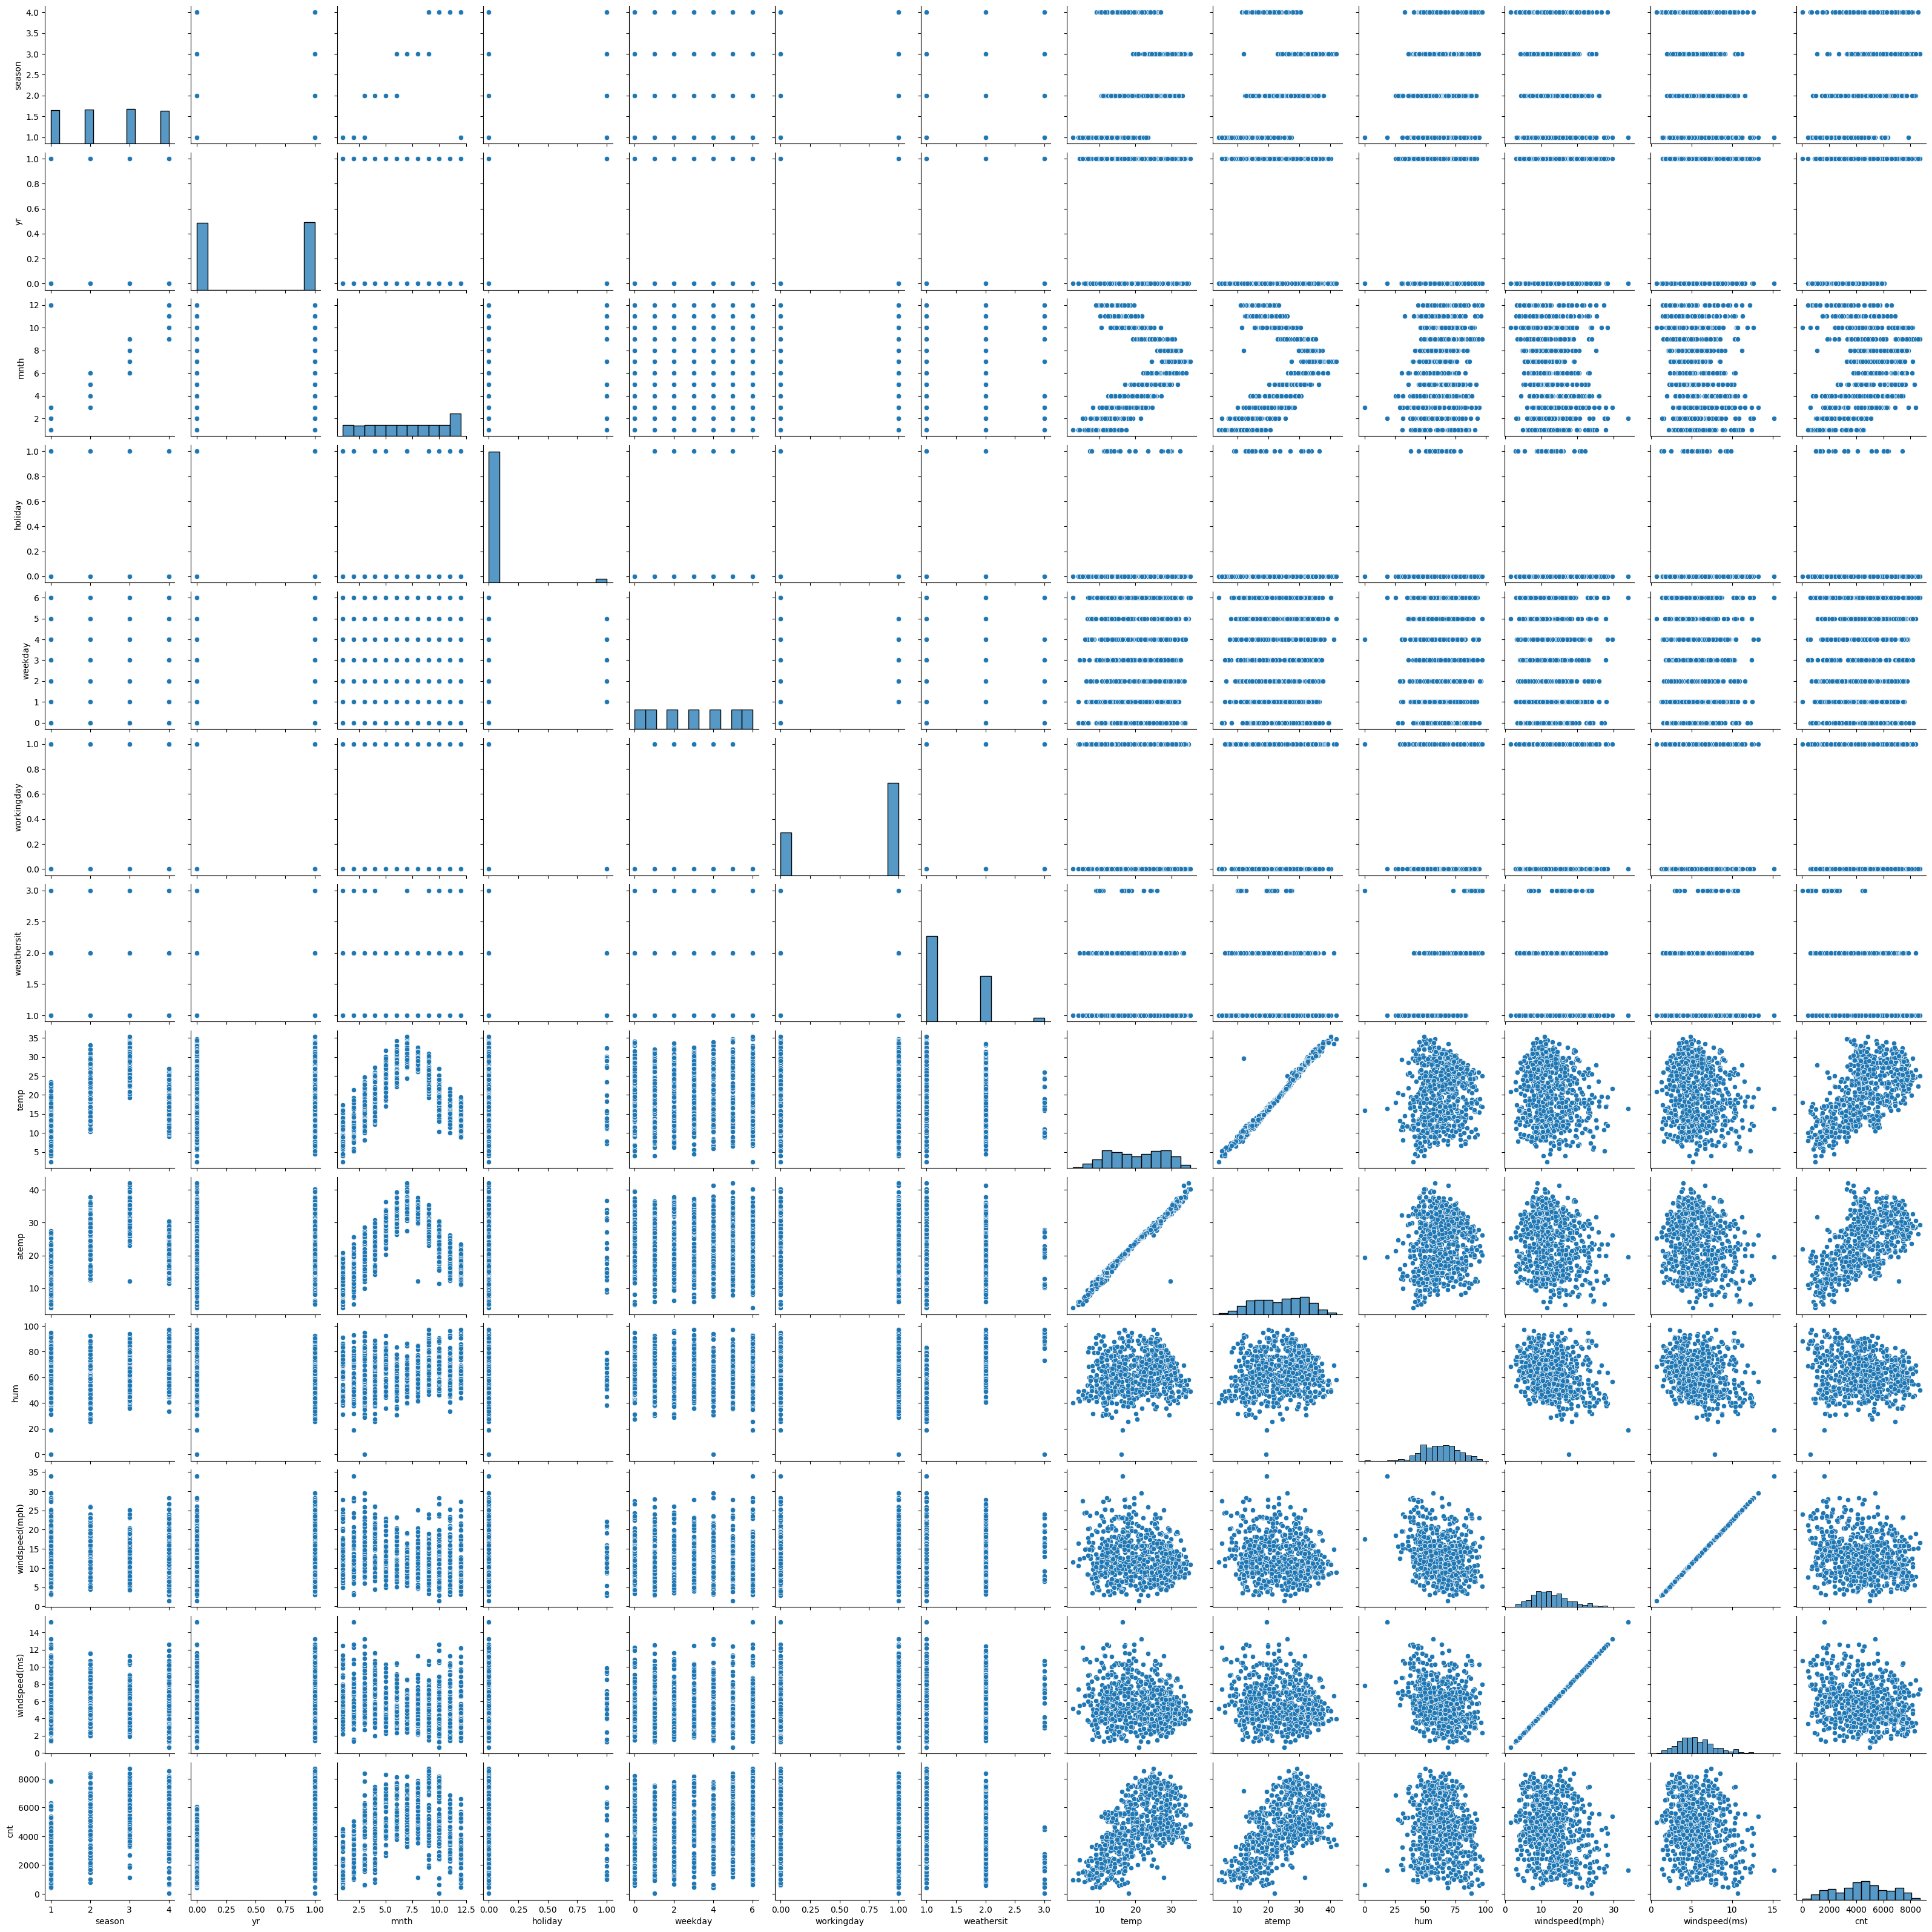

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("bikes_rent.csv")
sb.pairplot(data=df)


Если оценивать визуально, столбцы windspeed полностью зависимы, temp и atemp сильно зависимы

In [2]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


Каков характер зависимости числа прокатов от месяца?<br>
> очень слабая (0.27) 

Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
> ощущаемая температура

Есть ли в данных похожие или дублирующие друг друга признаки?
> windspeed, temp и atemp

Как вы можете показать их похожесть?
> `df.corr()`

Удалите такие признаки из датасета.

In [4]:
df.drop(['windspeed(mph)', 'temp'], axis=1, inplace=True)

In [6]:
corr = df.corr().abs()
corr[corr >= 0.5]

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed(ms),cnt
season,1.00000,NaN,0.83144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566710
mnth,0.83144,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weathersit,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.591045,NaN,NaN
atemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.631066
hum,NaN,NaN,NaN,NaN,NaN,NaN,0.591045,NaN,1.000000,NaN,NaN
windspeed(ms),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Разбейте данные на тренировочные и тестовые. Обучите модель линейной
регрессии. Выведите точность предсказания модели для тестовых данных. 

In [8]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8192187744951053